# Actual Implementation

In [1]:
from haloflow.dann.data_loader import SimulationDataset
from haloflow.dann import model as M
from haloflow.dann import train as T
from haloflow.dann import evalutate as E
from haloflow.dann import visualise as V

from haloflow import config as C

In [2]:
import torch

In [8]:
# Configuration
config = {
    'sims': ['TNG50', 'TNG100', 'Eagle100', 'Simba100', 'TNG_ALL'],
    'obs': 'mags_morph',
    'dat_dir': C.get_dat_dir(),
    'input_dim': None,  # Will be inferred from data
    'num_domains': 4,
    'batch_size': 128,
    'num_epochs': 150,
    'lr': 0.001,
    'alpha': 1e2,
#     'alpha': 1e5,
    'feature_layers': [64, 16],
    'label_layers': [16, 8],
    'domain_layers': [16, 8],
}

# hyper parameters - priors
# alpha - 0 to 1e3 (log scale)
# lr - 0.01 to 2e-5 (log scale)

In [9]:
dataset = SimulationDataset(config['sims'], config['obs'], config['dat_dir'])
train_loader, test_loader = dataset.get_train_test_loaders(
    train_sims=config['sims'][:-1],  # First 4 sims for training
    test_sim=config['sims'][-1],      # Last sim (TNG_ALL) for testing
    batch_size=config['batch_size']
)

In [10]:
# Infer input dimension from data
sample_X, _, _ = next(iter(train_loader))
config['input_dim'] = sample_X.shape[1]

In [11]:
sample_X.shape[1]

20

In [11]:
# Initialize model
model = M.DANN(input_dim=config['input_dim'], 
               num_domains=config['num_domains'], 
               alpha=config['alpha'],
               feature_layers=config['feature_layers'],
               label_layers=config['label_layers'],
               domain_layers=config['domain_layers'],
        )

In [12]:
# Train
T.train_dann(
    model, 
    train_loader, 
    test_loader, 
    num_epochs=config['num_epochs'], 
    lr=config['lr'], 
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

Epoch 1: 100%|██████████| 248/248 [00:01<00:00, 244.02it/s]


Loss task: 9.275339126586914, Loss domain: 1.2183197736740112
Test MSE: 8.7610
Epoch 1 | Loss: 56.1253 | Domain Acc: 0.4160


Epoch 2: 100%|██████████| 248/248 [00:01<00:00, 244.36it/s]


Loss task: 3.9325363636016846, Loss domain: 1.1808782815933228
Test MSE: 4.3810
Epoch 2 | Loss: 6.9728 | Domain Acc: 0.4982


Epoch 3: 100%|██████████| 248/248 [00:01<00:00, 244.52it/s]


Loss task: 1.5750176906585693, Loss domain: 1.2993168830871582
Test MSE: 3.6661
Epoch 3 | Loss: 3.4736 | Domain Acc: 0.3127


Epoch 4: 100%|██████████| 248/248 [00:01<00:00, 243.94it/s]


Loss task: 1.2484217882156372, Loss domain: 1.1767271757125854
Test MSE: 2.8459
Epoch 4 | Loss: 2.5461 | Domain Acc: 0.4562


Epoch 5: 100%|██████████| 248/248 [00:01<00:00, 244.23it/s]


Loss task: 1.0685575008392334, Loss domain: 1.2208836078643799
Test MSE: 1.9883
Epoch 5 | Loss: 2.4576 | Domain Acc: 0.4353


Epoch 6: 100%|██████████| 248/248 [00:01<00:00, 244.38it/s]


Loss task: 2.7173216342926025, Loss domain: 1.1620769500732422
Test MSE: 2.3117
Epoch 6 | Loss: 2.1738 | Domain Acc: 0.4322


Epoch 7: 100%|██████████| 248/248 [00:01<00:00, 244.42it/s]


Loss task: 0.6747058033943176, Loss domain: 1.2295918464660645
Test MSE: 1.6316
Epoch 7 | Loss: 2.0508 | Domain Acc: 0.3722


Epoch 8: 100%|██████████| 248/248 [00:01<00:00, 244.23it/s]


Loss task: 0.7524349093437195, Loss domain: 1.2750418186187744
Test MSE: 2.0874
Epoch 8 | Loss: 2.1360 | Domain Acc: 0.3540


Epoch 9: 100%|██████████| 248/248 [00:01<00:00, 244.42it/s]


Loss task: 0.34613049030303955, Loss domain: 1.2612793445587158
Test MSE: 1.0181
Epoch 9 | Loss: 1.7265 | Domain Acc: 0.4356


Epoch 10: 100%|██████████| 248/248 [00:01<00:00, 244.26it/s]


Loss task: 0.2804543077945709, Loss domain: 1.209327220916748
Test MSE: 0.9337
Epoch 10 | Loss: 1.5303 | Domain Acc: 0.4360


Epoch 11: 100%|██████████| 248/248 [00:01<00:00, 243.89it/s]


Loss task: 0.3004012703895569, Loss domain: 1.2379255294799805
Test MSE: 0.6942
Epoch 11 | Loss: 1.6868 | Domain Acc: 0.4355


Epoch 12: 100%|██████████| 248/248 [00:01<00:00, 244.40it/s]


Loss task: 0.29711276292800903, Loss domain: 1.2997936010360718
Test MSE: 0.8036
Epoch 12 | Loss: 1.5783 | Domain Acc: 0.4361


Epoch 13: 100%|██████████| 248/248 [00:01<00:00, 244.38it/s]


Loss task: 0.24740275740623474, Loss domain: 1.1520229578018188
Test MSE: 0.5149
Epoch 13 | Loss: 1.4827 | Domain Acc: 0.4361


Epoch 14: 100%|██████████| 248/248 [00:01<00:00, 244.35it/s]


Loss task: 0.15558680891990662, Loss domain: 1.1744288206100464
Test MSE: 0.5554
Epoch 14 | Loss: 1.4588 | Domain Acc: 0.4361


Epoch 15: 100%|██████████| 248/248 [00:01<00:00, 244.24it/s]


Loss task: 0.10667871683835983, Loss domain: 1.3089414834976196
Test MSE: 0.4134
Epoch 15 | Loss: 1.4153 | Domain Acc: 0.4361


Epoch 16: 100%|██████████| 248/248 [00:01<00:00, 244.48it/s]


Loss task: 0.11062678694725037, Loss domain: 1.2072820663452148
Test MSE: 0.3175
Epoch 16 | Loss: 1.3937 | Domain Acc: 0.4361


Epoch 17: 100%|██████████| 248/248 [00:01<00:00, 244.38it/s]


Loss task: 0.19597360491752625, Loss domain: 1.167098045349121
Test MSE: 0.4654
Epoch 17 | Loss: 1.4370 | Domain Acc: 0.4361


Epoch 18: 100%|██████████| 248/248 [00:01<00:00, 244.63it/s]


Loss task: 0.5892764925956726, Loss domain: 1.1639424562454224
Test MSE: 1.1006
Epoch 18 | Loss: 1.4791 | Domain Acc: 0.4383


Epoch 19: 100%|██████████| 248/248 [00:01<00:00, 244.87it/s]


Loss task: 0.15190280973911285, Loss domain: 1.2103084325790405
Test MSE: 0.3250
Epoch 19 | Loss: 1.4720 | Domain Acc: 0.4360


Epoch 20: 100%|██████████| 248/248 [00:01<00:00, 244.65it/s]


Loss task: 0.2326735407114029, Loss domain: 1.1885714530944824
Test MSE: 0.5009
Epoch 20 | Loss: 1.4074 | Domain Acc: 0.4360


Epoch 21: 100%|██████████| 248/248 [00:01<00:00, 244.47it/s]


Loss task: 0.09488344192504883, Loss domain: 1.2316877841949463
Test MSE: 0.4112
Epoch 21 | Loss: 1.4112 | Domain Acc: 0.4361


Epoch 22: 100%|██████████| 248/248 [00:01<00:00, 243.95it/s]


Loss task: 0.25081974267959595, Loss domain: 1.2471998929977417
Test MSE: 0.4406
Epoch 22 | Loss: 1.4037 | Domain Acc: 0.3917


Epoch 23: 100%|██████████| 248/248 [00:01<00:00, 244.44it/s]


Loss task: 0.44090011715888977, Loss domain: 1.3045493364334106
Test MSE: 1.0829
Epoch 23 | Loss: 2.2004 | Domain Acc: 0.3518


Epoch 24: 100%|██████████| 248/248 [00:01<00:00, 244.21it/s]


Loss task: 0.10459361970424652, Loss domain: 1.1533215045928955
Test MSE: 0.8292
Epoch 24 | Loss: 1.4999 | Domain Acc: 0.4362


Epoch 25: 100%|██████████| 248/248 [00:01<00:00, 244.32it/s]


Loss task: 0.14619208872318268, Loss domain: 1.2520701885223389
Test MSE: 0.4584
Epoch 25 | Loss: 1.4145 | Domain Acc: 0.4382


Epoch 26: 100%|██████████| 248/248 [00:01<00:00, 244.26it/s]


Loss task: 0.11333039402961731, Loss domain: 1.283888816833496
Test MSE: 0.5506
Epoch 26 | Loss: 1.3665 | Domain Acc: 0.4351


Epoch 27: 100%|██████████| 248/248 [00:01<00:00, 244.59it/s]


Loss task: 0.36985599994659424, Loss domain: 1.2277615070343018
Test MSE: 0.7604
Epoch 27 | Loss: 1.4055 | Domain Acc: 0.4407


Epoch 28: 100%|██████████| 248/248 [00:01<00:00, 244.04it/s]


Loss task: 0.19451045989990234, Loss domain: 1.1884138584136963
Test MSE: 0.2980
Epoch 28 | Loss: 1.4766 | Domain Acc: 0.4566


Epoch 29: 100%|██████████| 248/248 [00:01<00:00, 243.86it/s]


Loss task: 0.30892813205718994, Loss domain: 1.1920315027236938
Test MSE: 0.6055
Epoch 29 | Loss: 1.4689 | Domain Acc: 0.4163


Epoch 30: 100%|██████████| 248/248 [00:01<00:00, 244.06it/s]


Loss task: 0.21463808417320251, Loss domain: 1.2264324426651
Test MSE: 0.4666
Epoch 30 | Loss: 1.4697 | Domain Acc: 0.4266


Epoch 31: 100%|██████████| 248/248 [00:01<00:00, 244.06it/s]


Loss task: 0.2353551685810089, Loss domain: 1.1943941116333008
Test MSE: 0.5843
Epoch 31 | Loss: 1.6195 | Domain Acc: 0.4303


Epoch 32: 100%|██████████| 248/248 [00:01<00:00, 244.30it/s]


Loss task: 0.32286080718040466, Loss domain: 1.3002655506134033
Test MSE: 0.6550
Epoch 32 | Loss: 1.3805 | Domain Acc: 0.4355


Epoch 33: 100%|██████████| 248/248 [00:01<00:00, 244.36it/s]


Loss task: 0.415252685546875, Loss domain: 1.154313564300537
Test MSE: 1.3859
Epoch 33 | Loss: 1.4011 | Domain Acc: 0.4362


Epoch 34: 100%|██████████| 248/248 [00:01<00:00, 244.41it/s]


Loss task: 0.115915946662426, Loss domain: 1.1880749464035034
Test MSE: 0.3753
Epoch 34 | Loss: 1.3767 | Domain Acc: 0.4352


Epoch 35: 100%|██████████| 248/248 [00:01<00:00, 244.29it/s]


Loss task: 0.1176772490143776, Loss domain: 1.2046822309494019
Test MSE: 0.3334
Epoch 35 | Loss: 1.3541 | Domain Acc: 0.4355


Epoch 36: 100%|██████████| 248/248 [00:01<00:00, 244.06it/s]


Loss task: 0.12187161296606064, Loss domain: 1.2877702713012695
Test MSE: 0.3665
Epoch 36 | Loss: 1.3286 | Domain Acc: 0.4360


Epoch 37: 100%|██████████| 248/248 [00:01<00:00, 244.48it/s]


Loss task: 0.14284390211105347, Loss domain: 1.2452902793884277
Test MSE: 0.2492
Epoch 37 | Loss: 1.3693 | Domain Acc: 0.4359


Epoch 38: 100%|██████████| 248/248 [00:01<00:00, 244.28it/s]


Loss task: 0.08112804591655731, Loss domain: 1.2107152938842773
Test MSE: 0.3989
Epoch 38 | Loss: 1.3128 | Domain Acc: 0.4361


Epoch 39: 100%|██████████| 248/248 [00:01<00:00, 244.31it/s]


Loss task: 0.09044816344976425, Loss domain: 1.232946515083313
Test MSE: 0.4282
Epoch 39 | Loss: 1.3205 | Domain Acc: 0.4359


Epoch 40: 100%|██████████| 248/248 [00:01<00:00, 244.08it/s]


Loss task: 0.08859764039516449, Loss domain: 1.3089743852615356
Test MSE: 0.2106
Epoch 40 | Loss: 1.3429 | Domain Acc: 0.4360


Epoch 41: 100%|██████████| 248/248 [00:01<00:00, 243.92it/s]


Loss task: 0.30217310786247253, Loss domain: 1.1809087991714478
Test MSE: 0.2943
Epoch 41 | Loss: 1.3527 | Domain Acc: 0.4206


Epoch 42: 100%|██████████| 248/248 [00:01<00:00, 244.08it/s]


Loss task: 0.27502143383026123, Loss domain: 1.2392305135726929
Test MSE: 1.0990
Epoch 42 | Loss: 1.4684 | Domain Acc: 0.4362


Epoch 43: 100%|██████████| 248/248 [00:01<00:00, 244.45it/s]


Loss task: 0.0832953155040741, Loss domain: 1.2088220119476318
Test MSE: 0.2970
Epoch 43 | Loss: 1.4650 | Domain Acc: 0.4367


Epoch 44: 100%|██████████| 248/248 [00:01<00:00, 244.17it/s]


Loss task: 0.3680593967437744, Loss domain: 1.1414684057235718
Test MSE: 0.7027
Epoch 44 | Loss: 1.3456 | Domain Acc: 0.4364


Epoch 45: 100%|██████████| 248/248 [00:01<00:00, 244.43it/s]


Loss task: 0.13230322301387787, Loss domain: 1.3019405603408813
Test MSE: 0.4082
Epoch 45 | Loss: 1.4246 | Domain Acc: 0.4387


Epoch 46: 100%|██████████| 248/248 [00:01<00:00, 243.81it/s]


Loss task: 0.07998861372470856, Loss domain: 1.2343908548355103
Test MSE: 0.2534
Epoch 46 | Loss: 1.3951 | Domain Acc: 0.4361


Epoch 47: 100%|██████████| 248/248 [00:01<00:00, 243.99it/s]


Loss task: 0.12063335627317429, Loss domain: 1.2040797472000122
Test MSE: 0.4658
Epoch 47 | Loss: 1.3451 | Domain Acc: 0.4361


Epoch 48: 100%|██████████| 248/248 [00:01<00:00, 243.87it/s]


Loss task: 0.08969239890575409, Loss domain: 1.2659143209457397
Test MSE: 0.1892
Epoch 48 | Loss: 1.3193 | Domain Acc: 0.4361


Epoch 49: 100%|██████████| 248/248 [00:01<00:00, 243.86it/s]


Loss task: 0.06400671601295471, Loss domain: 1.173991084098816
Test MSE: 0.3768
Epoch 49 | Loss: 1.3182 | Domain Acc: 0.4361


Epoch 50: 100%|██████████| 248/248 [00:01<00:00, 244.30it/s]


Loss task: 0.0564923956990242, Loss domain: 1.1916694641113281
Test MSE: 0.2041
Epoch 50 | Loss: 1.2970 | Domain Acc: 0.4361


Epoch 51: 100%|██████████| 248/248 [00:01<00:00, 244.18it/s]


Loss task: 0.043705981224775314, Loss domain: 1.1914153099060059
Test MSE: 0.2139
Epoch 51 | Loss: 1.2956 | Domain Acc: 0.4361


Epoch 52: 100%|██████████| 248/248 [00:01<00:00, 244.19it/s]


Loss task: 0.047403447329998016, Loss domain: 1.242911696434021
Test MSE: 0.1962
Epoch 52 | Loss: 1.2927 | Domain Acc: 0.4361


Epoch 53: 100%|██████████| 248/248 [00:01<00:00, 244.02it/s]


Loss task: 0.16146178543567657, Loss domain: 1.2038884162902832
Test MSE: 0.2886
Epoch 53 | Loss: 1.2969 | Domain Acc: 0.4361


Epoch 54: 100%|██████████| 248/248 [00:01<00:00, 244.27it/s]


Loss task: 0.1677013784646988, Loss domain: 1.2336586713790894
Test MSE: 0.3337
Epoch 54 | Loss: 1.2994 | Domain Acc: 0.4361


Epoch 55: 100%|██████████| 248/248 [00:01<00:00, 244.19it/s]


Loss task: 0.04431278258562088, Loss domain: 1.2219834327697754
Test MSE: 0.2041
Epoch 55 | Loss: 1.2957 | Domain Acc: 0.4361


Epoch 56: 100%|██████████| 248/248 [00:01<00:00, 244.27it/s]


Loss task: 0.061699941754341125, Loss domain: 1.1828947067260742
Test MSE: 0.2147
Epoch 56 | Loss: 1.2868 | Domain Acc: 0.4361


Epoch 57: 100%|██████████| 248/248 [00:01<00:00, 243.84it/s]


Loss task: 0.05721748620271683, Loss domain: 1.207485318183899
Test MSE: 0.2453
Epoch 57 | Loss: 1.2902 | Domain Acc: 0.4361


Epoch 58: 100%|██████████| 248/248 [00:01<00:00, 243.91it/s]


Loss task: 0.05772797018289566, Loss domain: 1.2306944131851196
Test MSE: 0.2195
Epoch 58 | Loss: 1.2792 | Domain Acc: 0.4361


Epoch 59: 100%|██████████| 248/248 [00:01<00:00, 243.79it/s]


Loss task: 0.031670309603214264, Loss domain: 1.2583746910095215
Test MSE: 0.2182
Epoch 59 | Loss: 1.2942 | Domain Acc: 0.4361


Epoch 60: 100%|██████████| 248/248 [00:01<00:00, 243.95it/s]


Loss task: 0.06181489676237106, Loss domain: 1.2156982421875
Test MSE: 0.2729
Epoch 60 | Loss: 1.2893 | Domain Acc: 0.4361


Epoch 61: 100%|██████████| 248/248 [00:01<00:00, 244.14it/s]


Loss task: 0.03277907893061638, Loss domain: 1.227346420288086
Test MSE: 0.1742
Epoch 61 | Loss: 1.2862 | Domain Acc: 0.4361


Epoch 62: 100%|██████████| 248/248 [00:01<00:00, 244.22it/s]


Loss task: 0.085710808634758, Loss domain: 1.224530816078186
Test MSE: 0.2972
Epoch 62 | Loss: 1.2787 | Domain Acc: 0.4361


Epoch 63: 100%|██████████| 248/248 [00:01<00:00, 244.44it/s]


Loss task: 0.06725020706653595, Loss domain: 1.2816237211227417
Test MSE: 0.1227
Epoch 63 | Loss: 1.2840 | Domain Acc: 0.4361


Epoch 64: 100%|██████████| 248/248 [00:01<00:00, 244.16it/s]


Loss task: 0.03786509856581688, Loss domain: 1.195701241493225
Test MSE: 0.1328
Epoch 64 | Loss: 1.2848 | Domain Acc: 0.4361


Epoch 65: 100%|██████████| 248/248 [00:01<00:00, 243.94it/s]


Loss task: 0.04308147728443146, Loss domain: 1.2743841409683228
Test MSE: 0.1225
Epoch 65 | Loss: 1.2856 | Domain Acc: 0.4361


Epoch 66: 100%|██████████| 248/248 [00:01<00:00, 244.01it/s]


Loss task: 0.04576520249247551, Loss domain: 1.3509125709533691
Test MSE: 0.1756
Epoch 66 | Loss: 1.2767 | Domain Acc: 0.4361


Epoch 67: 100%|██████████| 248/248 [00:01<00:00, 244.04it/s]


Loss task: 0.08160462975502014, Loss domain: 1.152951717376709
Test MSE: 0.1058
Epoch 67 | Loss: 1.2793 | Domain Acc: 0.4361


Epoch 68: 100%|██████████| 248/248 [00:01<00:00, 244.08it/s]


Loss task: 0.15957853198051453, Loss domain: 1.2069628238677979
Test MSE: 0.2793
Epoch 68 | Loss: 1.2828 | Domain Acc: 0.4361


Epoch 69: 100%|██████████| 248/248 [00:01<00:00, 244.26it/s]


Loss task: 0.06852345913648605, Loss domain: 1.2436202764511108
Test MSE: 0.1259
Epoch 69 | Loss: 1.2772 | Domain Acc: 0.4361


Epoch 70: 100%|██████████| 248/248 [00:01<00:00, 244.39it/s]


Loss task: 0.03010585717856884, Loss domain: 1.261306643486023
Test MSE: 0.1752
Epoch 70 | Loss: 1.2740 | Domain Acc: 0.4361


Epoch 71: 100%|██████████| 248/248 [00:01<00:00, 244.13it/s]


Loss task: 0.030267562717199326, Loss domain: 1.336622714996338
Test MSE: 0.1418
Epoch 71 | Loss: 1.2728 | Domain Acc: 0.4361


Epoch 72: 100%|██████████| 248/248 [00:01<00:00, 244.34it/s]


Loss task: 0.05958619341254234, Loss domain: 1.236154317855835
Test MSE: 0.1276
Epoch 72 | Loss: 1.2747 | Domain Acc: 0.4361


Epoch 73: 100%|██████████| 248/248 [00:01<00:00, 244.26it/s]


Loss task: 0.04404587298631668, Loss domain: 1.1807277202606201
Test MSE: 0.1379
Epoch 73 | Loss: 1.2764 | Domain Acc: 0.4361


Epoch 74: 100%|██████████| 248/248 [00:01<00:00, 244.00it/s]


Loss task: 0.1051354706287384, Loss domain: 1.2156988382339478
Test MSE: 0.1389
Epoch 74 | Loss: 1.2695 | Domain Acc: 0.4361


Epoch 75: 100%|██████████| 248/248 [00:01<00:00, 244.43it/s]


Loss task: 0.02473735809326172, Loss domain: 1.272473692893982
Test MSE: 0.0922
Epoch 75 | Loss: 1.2768 | Domain Acc: 0.4361


Epoch 76: 100%|██████████| 248/248 [00:01<00:00, 243.89it/s]


Loss task: 0.03104127012193203, Loss domain: 1.1912696361541748
Test MSE: 0.2077
Epoch 76 | Loss: 1.2795 | Domain Acc: 0.4361


Epoch 77: 100%|██████████| 248/248 [00:01<00:00, 243.88it/s]


Loss task: 0.03928232192993164, Loss domain: 1.1182194948196411
Test MSE: 0.2135
Epoch 77 | Loss: 1.2759 | Domain Acc: 0.4361


Epoch 78: 100%|██████████| 248/248 [00:01<00:00, 243.70it/s]


Loss task: 0.0305185504257679, Loss domain: 1.2785264253616333
Test MSE: 0.1337
Epoch 78 | Loss: 1.2692 | Domain Acc: 0.4361


Epoch 79: 100%|██████████| 248/248 [00:01<00:00, 244.27it/s]


Loss task: 0.03525940328836441, Loss domain: 1.2276287078857422
Test MSE: 0.1645
Epoch 79 | Loss: 1.2729 | Domain Acc: 0.4361


Epoch 80: 100%|██████████| 248/248 [00:01<00:00, 244.05it/s]


Loss task: 0.06176813691854477, Loss domain: 1.2688544988632202
Test MSE: 0.1856
Epoch 80 | Loss: 1.2826 | Domain Acc: 0.4361


Epoch 81: 100%|██████████| 248/248 [00:01<00:00, 244.40it/s]


Loss task: 0.07862679660320282, Loss domain: 1.2283934354782104
Test MSE: 0.0741
Epoch 81 | Loss: 1.2698 | Domain Acc: 0.4361


Epoch 82: 100%|██████████| 248/248 [00:01<00:00, 244.11it/s]


Loss task: 0.039590634405612946, Loss domain: 1.2667609453201294
Test MSE: 0.1549
Epoch 82 | Loss: 1.2768 | Domain Acc: 0.4361


Epoch 83: 100%|██████████| 248/248 [00:01<00:00, 243.99it/s]


Loss task: 0.03995707258582115, Loss domain: 1.2369381189346313
Test MSE: 0.2028
Epoch 83 | Loss: 1.2841 | Domain Acc: 0.4361


Epoch 84: 100%|██████████| 248/248 [00:01<00:00, 243.16it/s]


Loss task: 0.058704640716314316, Loss domain: 1.2426141500473022
Test MSE: 0.1607
Epoch 84 | Loss: 1.2649 | Domain Acc: 0.4361


Epoch 85: 100%|██████████| 248/248 [00:01<00:00, 244.14it/s]


Loss task: 0.03362775966525078, Loss domain: 1.2301194667816162
Test MSE: 0.1538
Epoch 85 | Loss: 1.2696 | Domain Acc: 0.4361


Epoch 86: 100%|██████████| 248/248 [00:01<00:00, 243.95it/s]


Loss task: 0.031161315739154816, Loss domain: 1.1875865459442139
Test MSE: 0.1920
Epoch 86 | Loss: 1.2679 | Domain Acc: 0.4361


Epoch 87: 100%|██████████| 248/248 [00:01<00:00, 244.12it/s]


Loss task: 0.04022807627916336, Loss domain: 1.248157262802124
Test MSE: 0.1400
Epoch 87 | Loss: 1.2800 | Domain Acc: 0.4361


Epoch 88: 100%|██████████| 248/248 [00:01<00:00, 243.96it/s]


Loss task: 0.020885257050395012, Loss domain: 1.1834760904312134
Test MSE: 0.1253
Epoch 88 | Loss: 1.2760 | Domain Acc: 0.4361


Epoch 89: 100%|██████████| 248/248 [00:01<00:00, 243.92it/s]


Loss task: 0.0324581116437912, Loss domain: 1.316651701927185
Test MSE: 0.2056
Epoch 89 | Loss: 1.2655 | Domain Acc: 0.4361


Epoch 90: 100%|██████████| 248/248 [00:01<00:00, 243.96it/s]


Loss task: 0.03321361914277077, Loss domain: 1.182332992553711
Test MSE: 0.2336
Epoch 90 | Loss: 1.2695 | Domain Acc: 0.4361


Epoch 91: 100%|██████████| 248/248 [00:01<00:00, 244.02it/s]


Loss task: 0.05071702226996422, Loss domain: 1.275535225868225
Test MSE: 0.1806
Epoch 91 | Loss: 1.2659 | Domain Acc: 0.4361


Epoch 92: 100%|██████████| 248/248 [00:01<00:00, 243.85it/s]


Loss task: 0.04702375456690788, Loss domain: 1.2607735395431519
Test MSE: 0.1440
Epoch 92 | Loss: 1.2648 | Domain Acc: 0.4361


Epoch 93: 100%|██████████| 248/248 [00:01<00:00, 243.92it/s]


Loss task: 0.03088207356631756, Loss domain: 1.224953293800354
Test MSE: 0.1609
Epoch 93 | Loss: 1.2716 | Domain Acc: 0.4361


Epoch 94: 100%|██████████| 248/248 [00:01<00:00, 241.37it/s]


Loss task: 0.016724612563848495, Loss domain: 1.2368563413619995
Test MSE: 0.1720
Epoch 94 | Loss: 1.2835 | Domain Acc: 0.4361


Epoch 95: 100%|██████████| 248/248 [00:01<00:00, 238.94it/s]


Loss task: 0.02895183302462101, Loss domain: 1.2215831279754639
Test MSE: 0.1634
Epoch 95 | Loss: 1.2689 | Domain Acc: 0.4361


Epoch 96: 100%|██████████| 248/248 [00:01<00:00, 240.17it/s]


Loss task: 0.033668164163827896, Loss domain: 1.1586641073226929
Test MSE: 0.1400
Epoch 96 | Loss: 1.2660 | Domain Acc: 0.4361


Epoch 97: 100%|██████████| 248/248 [00:01<00:00, 239.81it/s]


Loss task: 0.04076894372701645, Loss domain: 1.2869137525558472
Test MSE: 0.1727
Epoch 97 | Loss: 1.2638 | Domain Acc: 0.4361


Epoch 98: 100%|██████████| 248/248 [00:01<00:00, 240.25it/s]


Loss task: 0.04037180915474892, Loss domain: 1.306081771850586
Test MSE: 0.1390
Epoch 98 | Loss: 1.2704 | Domain Acc: 0.4361


Epoch 99: 100%|██████████| 248/248 [00:01<00:00, 240.29it/s]


Loss task: 0.02787826396524906, Loss domain: 1.1679461002349854
Test MSE: 0.1838
Epoch 99 | Loss: 1.2639 | Domain Acc: 0.4361


Epoch 100: 100%|██████████| 248/248 [00:01<00:00, 239.87it/s]


Loss task: 0.02629946917295456, Loss domain: 1.287571907043457
Test MSE: 0.1814
Epoch 100 | Loss: 1.2636 | Domain Acc: 0.4361


Epoch 101: 100%|██████████| 248/248 [00:01<00:00, 240.06it/s]


Loss task: 0.042874205857515335, Loss domain: 1.2702308893203735
Test MSE: 0.1433
Epoch 101 | Loss: 1.2734 | Domain Acc: 0.4361


Epoch 102: 100%|██████████| 248/248 [00:01<00:00, 240.19it/s]


Loss task: 0.028449879959225655, Loss domain: 1.2423354387283325
Test MSE: 0.1461
Epoch 102 | Loss: 1.2693 | Domain Acc: 0.4361


Epoch 103: 100%|██████████| 248/248 [00:01<00:00, 239.19it/s]


Loss task: 0.04180009290575981, Loss domain: 1.1981232166290283
Test MSE: 0.1492
Epoch 103 | Loss: 1.2650 | Domain Acc: 0.4361


Epoch 104: 100%|██████████| 248/248 [00:01<00:00, 240.06it/s]


Loss task: 0.03386282920837402, Loss domain: 1.2206538915634155
Test MSE: 0.0795
Epoch 104 | Loss: 1.2638 | Domain Acc: 0.4361


Epoch 105: 100%|██████████| 248/248 [00:01<00:00, 239.64it/s]


Loss task: 0.02293958142399788, Loss domain: 1.1529103517532349
Test MSE: 0.1102
Epoch 105 | Loss: 1.2751 | Domain Acc: 0.4361


Epoch 106: 100%|██████████| 248/248 [00:01<00:00, 239.90it/s]


Loss task: 0.030653517693281174, Loss domain: 1.2039076089859009
Test MSE: 0.1155
Epoch 106 | Loss: 1.2649 | Domain Acc: 0.4361


Epoch 107: 100%|██████████| 248/248 [00:01<00:00, 239.87it/s]


Loss task: 0.026254745200276375, Loss domain: 1.2270276546478271
Test MSE: 0.2407
Epoch 107 | Loss: 1.2646 | Domain Acc: 0.4361


Epoch 108: 100%|██████████| 248/248 [00:01<00:00, 240.94it/s]


Loss task: 0.03347955271601677, Loss domain: 1.1386643648147583
Test MSE: 0.1925
Epoch 108 | Loss: 1.2622 | Domain Acc: 0.4361


Epoch 109: 100%|██████████| 248/248 [00:01<00:00, 240.01it/s]


Loss task: 0.04050345718860626, Loss domain: 1.2428221702575684
Test MSE: 0.2006
Epoch 109 | Loss: 1.2619 | Domain Acc: 0.4361


Epoch 110: 100%|██████████| 248/248 [00:01<00:00, 239.66it/s]


Loss task: 0.033796198666095734, Loss domain: 1.2610758543014526
Test MSE: 0.1775
Epoch 110 | Loss: 1.2660 | Domain Acc: 0.4361


Epoch 111: 100%|██████████| 248/248 [00:01<00:00, 239.73it/s]


Loss task: 0.03233284130692482, Loss domain: 1.3022403717041016
Test MSE: 0.1760
Epoch 111 | Loss: 1.2611 | Domain Acc: 0.4361


Epoch 112: 100%|██████████| 248/248 [00:01<00:00, 240.04it/s]


Loss task: 0.016449302434921265, Loss domain: 1.167317509651184
Test MSE: 0.1435
Epoch 112 | Loss: 1.2692 | Domain Acc: 0.4361


Epoch 113: 100%|██████████| 248/248 [00:01<00:00, 239.83it/s]


Loss task: 0.03191765025258064, Loss domain: 1.2666378021240234
Test MSE: 0.1490
Epoch 113 | Loss: 1.2605 | Domain Acc: 0.4361


Epoch 114: 100%|██████████| 248/248 [00:01<00:00, 240.00it/s]


Loss task: 0.023600472137331963, Loss domain: 1.184120535850525
Test MSE: 0.1894
Epoch 114 | Loss: 1.2646 | Domain Acc: 0.4361


Epoch 115: 100%|██████████| 248/248 [00:01<00:00, 239.89it/s]


Loss task: 0.039241641759872437, Loss domain: 1.2869477272033691
Test MSE: 0.1662
Epoch 115 | Loss: 1.2667 | Domain Acc: 0.4361


Epoch 116: 100%|██████████| 248/248 [00:01<00:00, 239.54it/s]


Loss task: 0.03548966720700264, Loss domain: 1.120295763015747
Test MSE: 0.1568
Epoch 116 | Loss: 1.2610 | Domain Acc: 0.4361


Epoch 117: 100%|██████████| 248/248 [00:01<00:00, 240.24it/s]


Loss task: 0.03217059001326561, Loss domain: 1.2520335912704468
Test MSE: 0.1279
Epoch 117 | Loss: 1.2650 | Domain Acc: 0.4361


Epoch 118: 100%|██████████| 248/248 [00:01<00:00, 238.04it/s]


Loss task: 0.037575628608465195, Loss domain: 1.28757643699646
Test MSE: 0.1501
Epoch 118 | Loss: 1.2653 | Domain Acc: 0.4361


Epoch 119: 100%|██████████| 248/248 [00:01<00:00, 236.50it/s]


Loss task: 0.03500746935606003, Loss domain: 1.2899317741394043
Test MSE: 0.1367
Epoch 119 | Loss: 1.2629 | Domain Acc: 0.4361


Epoch 120: 100%|██████████| 248/248 [00:01<00:00, 235.05it/s]


Loss task: 0.03805491328239441, Loss domain: 1.1768708229064941
Test MSE: 0.1298
Epoch 120 | Loss: 1.2629 | Domain Acc: 0.4361


Epoch 121: 100%|██████████| 248/248 [00:01<00:00, 235.50it/s]


Loss task: 0.02236102521419525, Loss domain: 1.215171217918396
Test MSE: 0.1306
Epoch 121 | Loss: 1.2606 | Domain Acc: 0.4361


Epoch 122: 100%|██████████| 248/248 [00:01<00:00, 235.38it/s]


Loss task: 0.04811412841081619, Loss domain: 1.2813897132873535
Test MSE: 0.2313
Epoch 122 | Loss: 1.2610 | Domain Acc: 0.4361


Epoch 123: 100%|██████████| 248/248 [00:01<00:00, 239.09it/s]


Loss task: 0.023637037724256516, Loss domain: 1.1359902620315552
Test MSE: 0.1681
Epoch 123 | Loss: 1.2626 | Domain Acc: 0.4361


Epoch 124: 100%|██████████| 248/248 [00:01<00:00, 235.12it/s]


Loss task: 0.030780194327235222, Loss domain: 1.2273743152618408
Test MSE: 0.1501
Epoch 124 | Loss: 1.2641 | Domain Acc: 0.4361


Epoch 125: 100%|██████████| 248/248 [00:01<00:00, 239.54it/s]


Loss task: 0.055321887135505676, Loss domain: 1.2398710250854492
Test MSE: 0.1544
Epoch 125 | Loss: 1.2611 | Domain Acc: 0.4361


Epoch 126: 100%|██████████| 248/248 [00:01<00:00, 241.00it/s]


Loss task: 0.0279677826911211, Loss domain: 1.1382108926773071
Test MSE: 0.1585
Epoch 126 | Loss: 1.2655 | Domain Acc: 0.4361


Epoch 127: 100%|██████████| 248/248 [00:01<00:00, 239.55it/s]


Loss task: 0.02724950946867466, Loss domain: 1.2297537326812744
Test MSE: 0.1404
Epoch 127 | Loss: 1.2652 | Domain Acc: 0.4361


Epoch 128: 100%|██████████| 248/248 [00:01<00:00, 203.17it/s]


Loss task: 0.022268526256084442, Loss domain: 1.2183459997177124
Test MSE: 0.1173
Epoch 128 | Loss: 1.2586 | Domain Acc: 0.4361


Epoch 129: 100%|██████████| 248/248 [00:01<00:00, 199.72it/s]


Loss task: 0.029384128749370575, Loss domain: 1.2422618865966797
Test MSE: 0.1831
Epoch 129 | Loss: 1.2645 | Domain Acc: 0.4361


Epoch 130: 100%|██████████| 248/248 [00:01<00:00, 199.38it/s]


Loss task: 0.052263908088207245, Loss domain: 1.2133346796035767
Test MSE: 0.1194
Epoch 130 | Loss: 1.2591 | Domain Acc: 0.4361


Epoch 131: 100%|██████████| 248/248 [00:01<00:00, 200.88it/s]


Loss task: 0.027550585567951202, Loss domain: 1.2994933128356934
Test MSE: 0.1683
Epoch 131 | Loss: 1.2582 | Domain Acc: 0.4361


Epoch 132: 100%|██████████| 248/248 [00:01<00:00, 201.54it/s]


Loss task: 0.025842813774943352, Loss domain: 1.1829986572265625
Test MSE: 0.1269
Epoch 132 | Loss: 1.2648 | Domain Acc: 0.4361


Epoch 133: 100%|██████████| 248/248 [00:01<00:00, 200.40it/s]


Loss task: 0.06528063863515854, Loss domain: 1.23687744140625
Test MSE: 0.2850
Epoch 133 | Loss: 1.2613 | Domain Acc: 0.4362


Epoch 134: 100%|██████████| 248/248 [00:01<00:00, 199.36it/s]


Loss task: 0.025860045105218887, Loss domain: 1.3262145519256592
Test MSE: 0.2270
Epoch 134 | Loss: 1.2693 | Domain Acc: 0.4361


Epoch 135: 100%|██████████| 248/248 [00:01<00:00, 205.00it/s]


Loss task: 0.04000738263130188, Loss domain: 1.215739130973816
Test MSE: 0.1798
Epoch 135 | Loss: 1.2620 | Domain Acc: 0.4360


Epoch 136: 100%|██████████| 248/248 [00:01<00:00, 198.96it/s]


Loss task: 0.02986663021147251, Loss domain: 1.224196195602417
Test MSE: 0.1760
Epoch 136 | Loss: 1.2597 | Domain Acc: 0.4361


Epoch 137: 100%|██████████| 248/248 [00:01<00:00, 204.47it/s]


Loss task: 0.029159896075725555, Loss domain: 1.2227414846420288
Test MSE: 0.2076
Epoch 137 | Loss: 1.2673 | Domain Acc: 0.4361


Epoch 138: 100%|██████████| 248/248 [00:01<00:00, 196.12it/s]


Loss task: 0.05231248587369919, Loss domain: 1.2116990089416504
Test MSE: 0.1884
Epoch 138 | Loss: 1.2618 | Domain Acc: 0.4361


Epoch 139: 100%|██████████| 248/248 [00:01<00:00, 209.93it/s]


Loss task: 0.03355099633336067, Loss domain: 1.3203951120376587
Test MSE: 0.1403
Epoch 139 | Loss: 1.2605 | Domain Acc: 0.4361


Epoch 140: 100%|██████████| 248/248 [00:01<00:00, 201.75it/s]


Loss task: 0.03291739150881767, Loss domain: 1.2363759279251099
Test MSE: 0.2330
Epoch 140 | Loss: 1.2587 | Domain Acc: 0.4361


Epoch 141: 100%|██████████| 248/248 [00:01<00:00, 201.03it/s]


Loss task: 0.04349394887685776, Loss domain: 1.2838350534439087
Test MSE: 0.1282
Epoch 141 | Loss: 1.2610 | Domain Acc: 0.4361


Epoch 142: 100%|██████████| 248/248 [00:01<00:00, 182.38it/s]


Loss task: 0.03599166497588158, Loss domain: 1.2694330215454102
Test MSE: 0.1752
Epoch 142 | Loss: 1.2594 | Domain Acc: 0.4361


Epoch 143: 100%|██████████| 248/248 [00:01<00:00, 243.01it/s]


Loss task: 0.029952801764011383, Loss domain: 1.1707018613815308
Test MSE: 0.1941
Epoch 143 | Loss: 1.2597 | Domain Acc: 0.4361


Epoch 144: 100%|██████████| 248/248 [00:01<00:00, 172.68it/s]


Loss task: 0.029513703659176826, Loss domain: 1.3137071132659912
Test MSE: 0.1775
Epoch 144 | Loss: 1.2591 | Domain Acc: 0.4361


Epoch 145: 100%|██████████| 248/248 [00:01<00:00, 211.64it/s]


Loss task: 0.028081774711608887, Loss domain: 1.1745907068252563
Test MSE: 0.1692
Epoch 145 | Loss: 1.2579 | Domain Acc: 0.4361


Epoch 146: 100%|██████████| 248/248 [00:01<00:00, 243.44it/s]


Loss task: 0.02636612206697464, Loss domain: 1.1831433773040771
Test MSE: 0.1538
Epoch 146 | Loss: 1.2584 | Domain Acc: 0.4361


Epoch 147: 100%|██████████| 248/248 [00:01<00:00, 197.62it/s]


Loss task: 0.024096928536891937, Loss domain: 1.2751102447509766
Test MSE: 0.1723
Epoch 147 | Loss: 1.2581 | Domain Acc: 0.4361


Epoch 148: 100%|██████████| 248/248 [00:01<00:00, 173.15it/s]


Loss task: 0.03008420392870903, Loss domain: 1.2249205112457275
Test MSE: 0.1725
Epoch 148 | Loss: 1.2645 | Domain Acc: 0.4361


Epoch 149: 100%|██████████| 248/248 [00:01<00:00, 173.01it/s]


Loss task: 0.022608520463109016, Loss domain: 1.2419393062591553
Test MSE: 0.1599
Epoch 149 | Loss: 1.2585 | Domain Acc: 0.4361


Epoch 150: 100%|██████████| 248/248 [00:01<00:00, 173.14it/s]


Loss task: 0.04812862351536751, Loss domain: 1.2477225065231323
Test MSE: 0.2449
Epoch 150 | Loss: 1.2584 | Domain Acc: 0.4361


In [13]:
# Evaluate
print("\nEvaluating Regression Performance:")
E.evaluate_regression(model, test_loader, 'cpu')

print("\nEvaluating Domain Accuracy:")
E.domain_accuracy(model, train_loader, 'cpu')


Evaluating Regression Performance:
MSE: 0.2449, RMSE: 0.4949, R²: 0.3565

Evaluating Domain Accuracy:
Domain Accuracy: 0.4361


0.43610848312835065

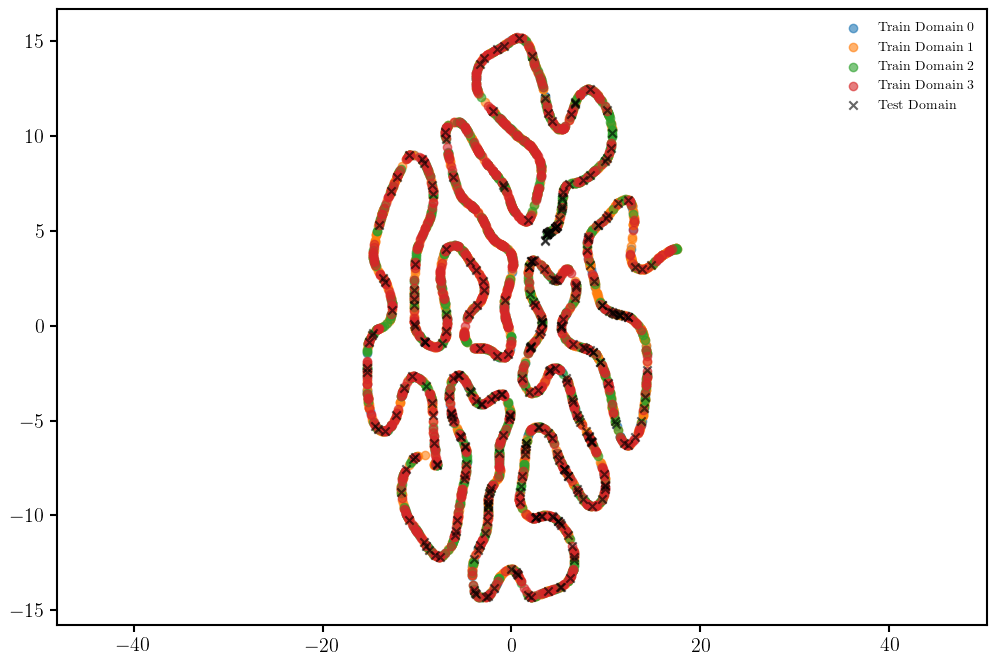

In [39]:
emb, labels = V.visualize_features_fast(model, train_loader, test_loader, n_samples=5000, device='cpu')
V.plot_combined_tsne(emb, labels,)

In [11]:
dat = dataset.data['TNG50']['Y_train']

In [12]:
sm = dat[:, 0]
hm = dat[:, 1]

(6717, 2)


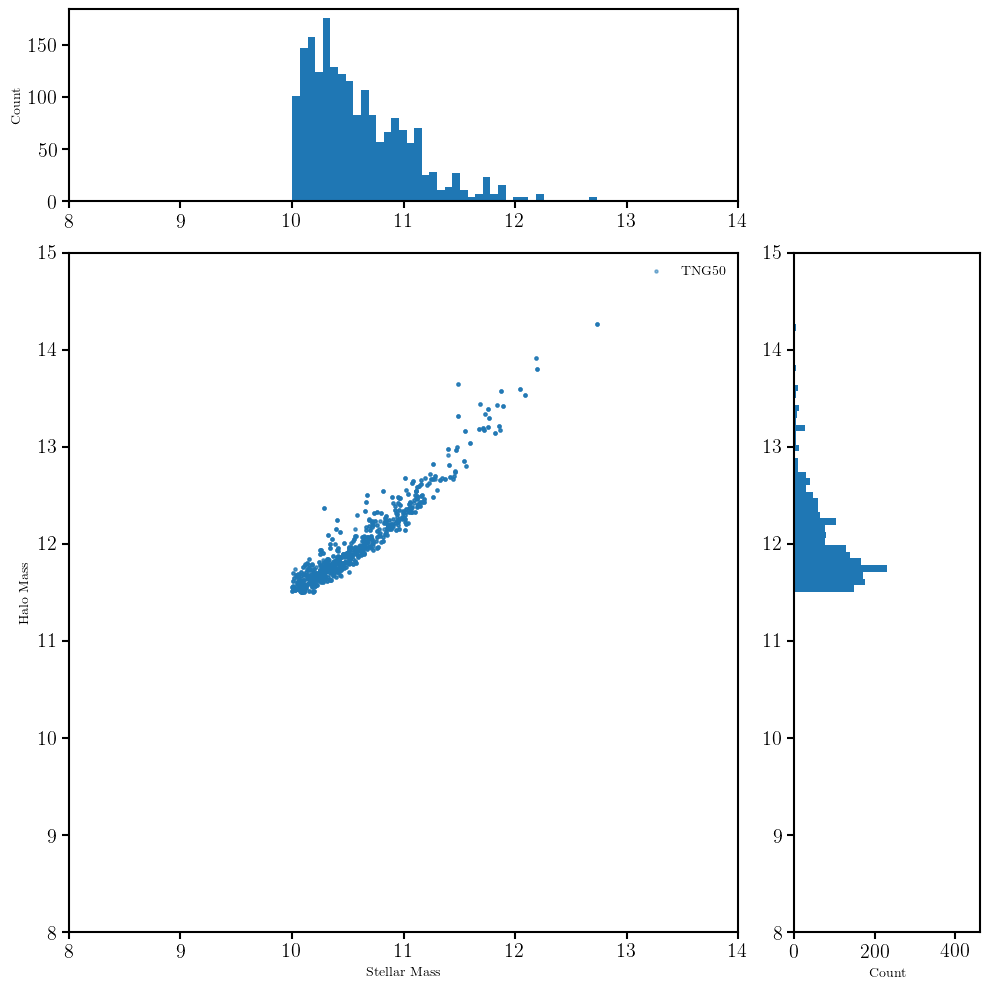

(13986, 2)


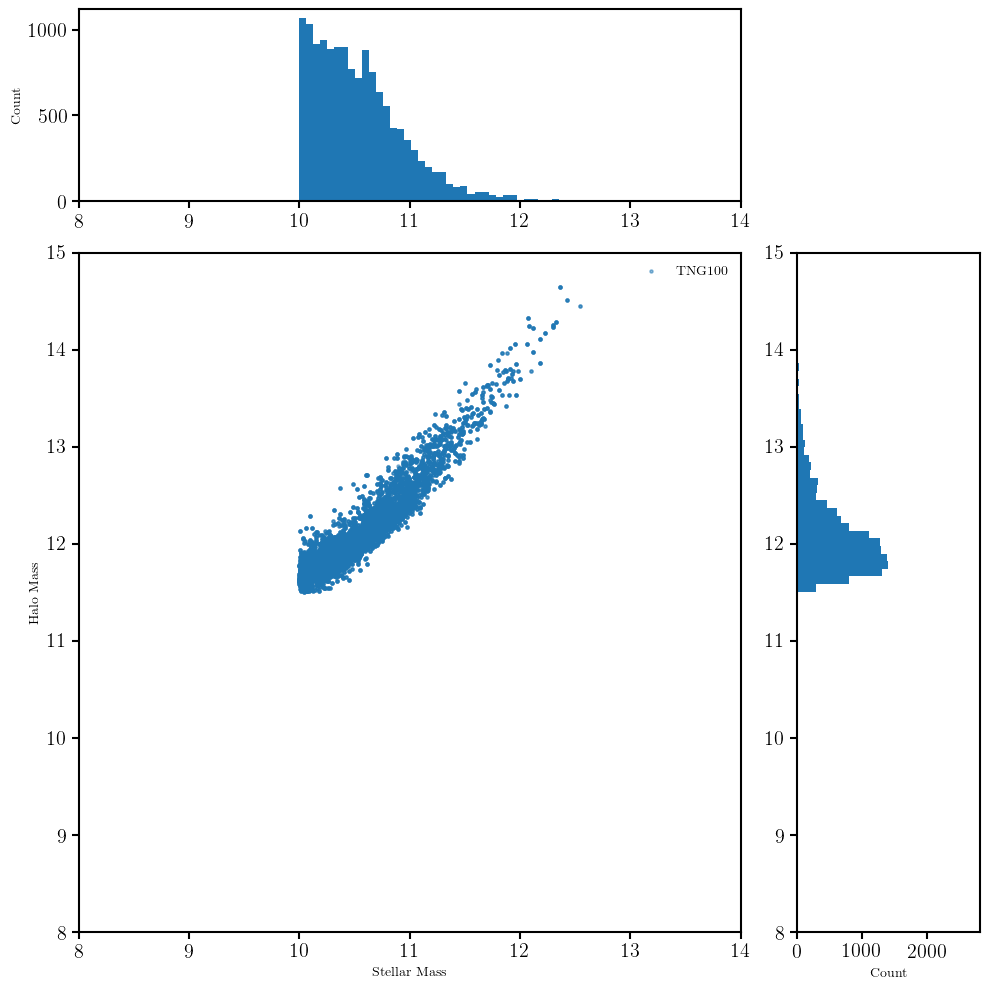

(8082, 2)


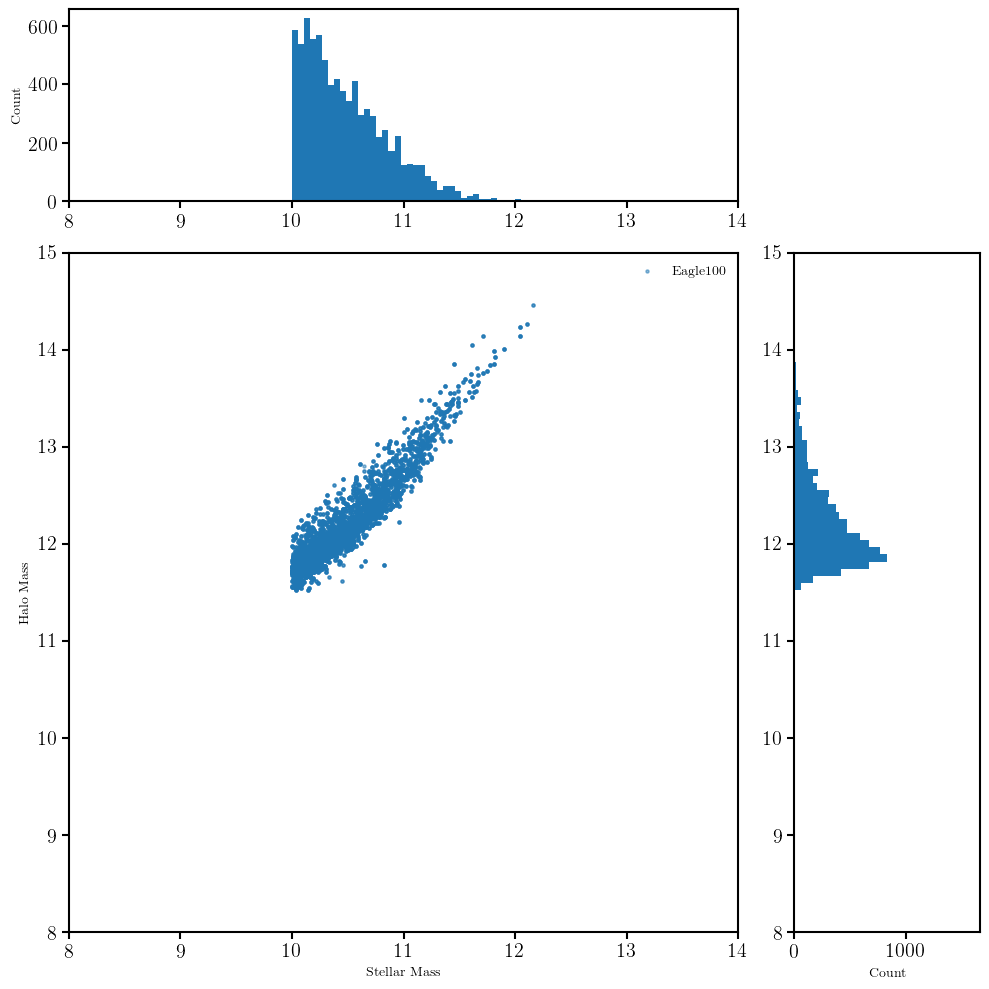

(8151, 2)


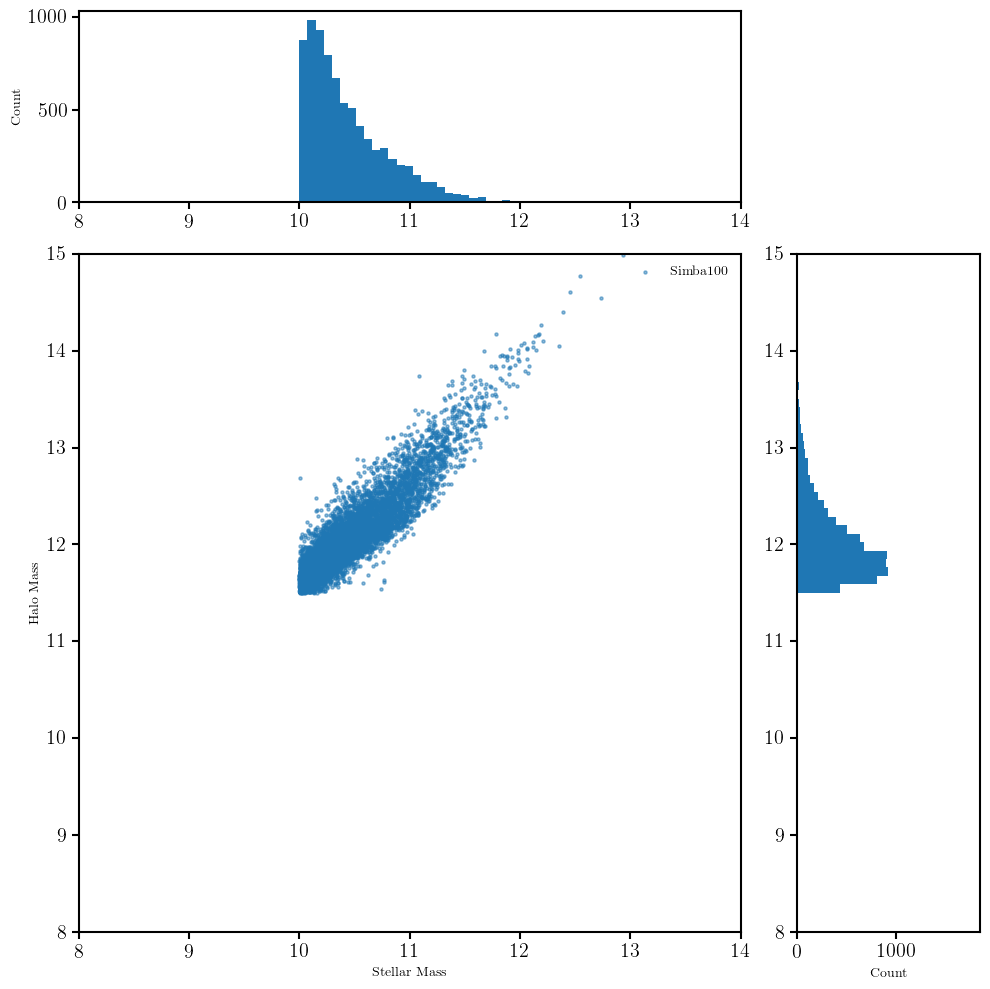

(20703, 2)


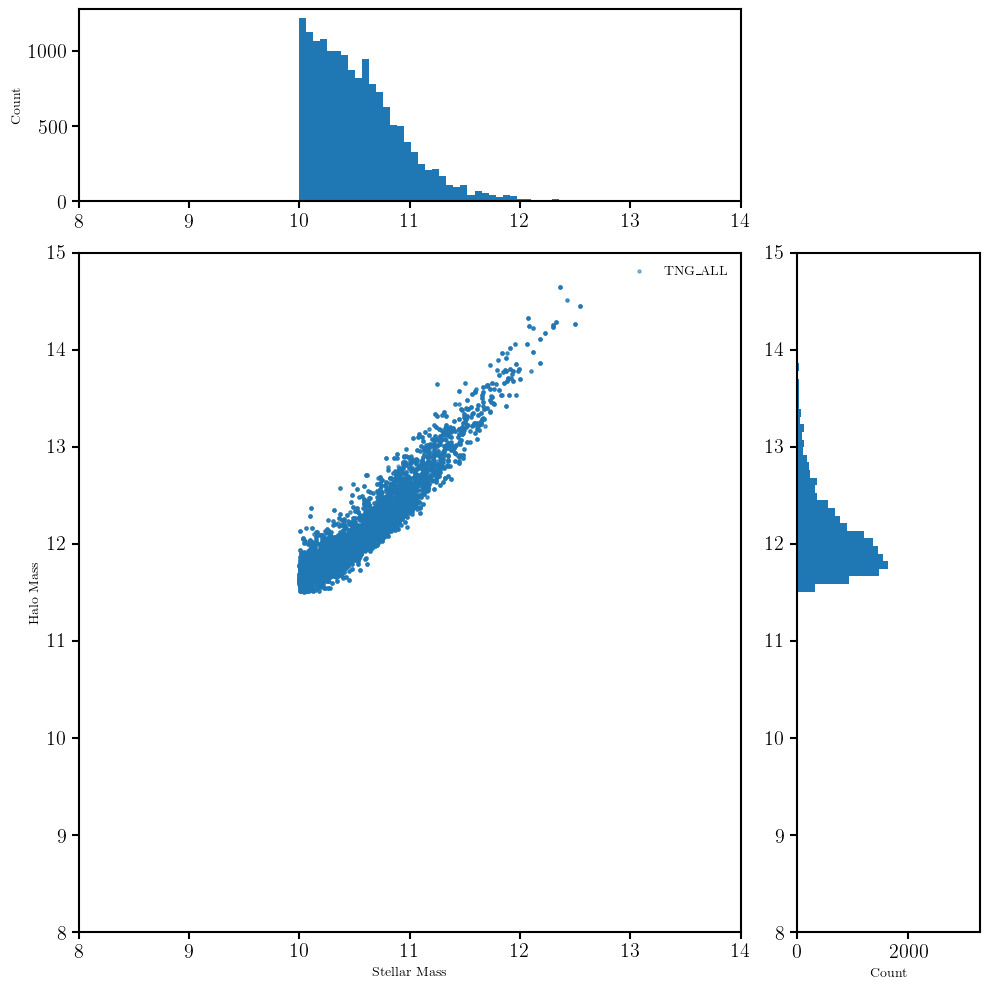

In [10]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

from haloflow.config import setup_plotting_config

setup_plotting_config()

for key in dataset.data.keys():
    # Example data
    dat = dataset.data[key]['Y_train']
    print(dat.shape)
    sm = dat[:, 0]
    hm = dat[:, 1]

#     mass_range_sm = [10.0, 13.]
#     mass_range_hm = [11.5, 15.]
#     mask_sm = (sm > mass_range_sm[0]) & (sm < mass_range_sm[1])
#     mask_hm = (hm > mass_range_hm[0]) & (hm < mass_range_hm[1])
#     sm = sm[mask_sm & mask_hm]
#     hm = hm[mask_sm & mask_hm]

    # Create the figure and grid layout
    fig = plt.figure(figsize=(10, 10))
    gs = gridspec.GridSpec(4, 4)

    # Main scatter plot
    ax_main = plt.subplot(gs[1:4, :3])

    ax_main.scatter(sm, hm, s=5, alpha=0.5, label=key)
    ax_main.set_xlabel('Stellar Mass')
    ax_main.set_ylabel('Halo Mass')
    ax_main.legend()

#     # Gray boxes outside the range
#     ax_main.axvspan(8, mass_range_sm[0], color='gray', alpha=0.5)
#     ax_main.axvspan(mass_range_sm[1], 15, color='gray', alpha=0.5)
#     ax_main.axhspan(9, mass_range_hm[0], color='gray', alpha=0.5)
#     ax_main.axhspan(mass_range_hm[1], 15, color='gray', alpha=0.5)

    # Set limits
    ax_main.set_xlim([8, 14])
    ax_main.set_ylim([8, 15])

    # Top histogram (stellar mass)
    ax_histx = plt.subplot(gs[0, :3], sharex=ax_main)
    ax_histx.hist(sm, bins=40, orientation='vertical')
    ax_histx.set_ylabel('Count')
    # ax_histx.set_xticks([])  # Remove x-ticks for the histogram

    # Right histogram (halo mass)
    ax_histy = plt.subplot(gs[1:4, 3], sharey=ax_main)
    ax_histy.hist(hm, bins=40, orientation='horizontal')
    ax_histy.set_xlabel('Count')
    # ax_histy.set_yticks([])  # Remove y-ticks for the histogram

    # Adjust layout
    plt.tight_layout()
    plt.show()